In [1]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.mobilenet_v2 import MobileNetV2
from keras.applications.mobilenet_v2 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import tensorflow
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image_dataset_from_directory


Using TensorFlow backend.


In [2]:
IMAGE_SIZE = [224, 224]

train_path = r'C:\Users\Praveen\Desktop\ShopBot\Dataset\Train'
test_path = r'C:\Users\Praveen\Desktop\ShopBot\Dataset\Test'

In [3]:
mobilenet = MobileNetV2(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [4]:
for layer in mobilenet.layers:
    layer.trainable = False

In [5]:
folders = glob(train_path+'\*')

In [6]:
x = Flatten()(mobilenet.output)

In [7]:
prediction = Dense(len(folders), activation='softmax')(x)
model = Model(inputs=mobilenet.input, outputs=prediction)

In [8]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 112, 112, 32) 0           bn_Conv1[0][0]                   
______________________________________________________________________________________________

block_16_depthwise (DepthwiseCo (None, 7, 7, 960)    8640        block_16_expand_relu[0][0]       
__________________________________________________________________________________________________
block_16_depthwise_BN (BatchNor (None, 7, 7, 960)    3840        block_16_depthwise[0][0]         
__________________________________________________________________________________________________
block_16_depthwise_relu (ReLU)  (None, 7, 7, 960)    0           block_16_depthwise_BN[0][0]      
__________________________________________________________________________________________________
block_16_project (Conv2D)       (None, 7, 7, 320)    307200      block_16_depthwise_relu[0][0]    
__________________________________________________________________________________________________
block_16_project_BN (BatchNorma (None, 7, 7, 320)    1280        block_16_project[0][0]           
__________________________________________________________________________________________________
Conv_1 (Co

In [11]:
metrics = [
    tensorflow.keras.metrics.Recall(),
    tensorflow.keras.metrics.Precision(),
    tensorflow.keras.metrics.Accuracy()
]
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=["acc"]
)

In [12]:

## AUGMENTATION 
train_datagen = ImageDataGenerator(rescale = 1./255,
shear_range = 0.2,
zoom_range = 0.2,
horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)
training_set = train_datagen.flow_from_directory(directory=train_path,
target_size = (224,224),
batch_size = 32,
class_mode = 'categorical')
test_set = test_datagen.flow_from_directory(directory=test_path,
target_size = (224,224),
batch_size = 32,
class_mode = 'categorical')
class_names = training_set.class_indices.keys()
print(class_names)



Found 5617 images belonging to 27 classes.
Found 1728 images belonging to 27 classes.
dict_keys(['BEANS', 'CAKE', 'CANDY', 'CEREAL', 'CHIPS', 'CHOCOLATE', 'COFFEE', 'CORN', 'FISH', 'FLOUR', 'HONEY', 'JAM', 'JUICE', 'MILK', 'NUTS', 'OIL', 'PASTA', 'PERFUME', 'RICE', 'SOAP', 'SODA', 'SPICES', 'SUGAR', 'TEA', 'TOMATO_SAUCE', 'VINEGAR', 'WATER'])


In [ ]:
m = model.fit(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/10
176/176 [==============================] - 309s 2s/step - loss: 8.2966 - acc: 0.4018 - val_loss: 2.4914 - val_acc: 0.7772
Epoch 2/10
176/176 [==============================] - 299s 2s/step - loss: 2.6664 - acc: 0.7650 - val_loss: 1.9569 - val_acc: 0.8351
Epoch 3/10
176/176 [==============================] - 298s 2s/step - loss: 1.8403 - acc: 0.8344 - val_loss: 1.0025 - val_acc: 0.9051
Epoch 4/10
 27/176 [===>..........................] - ETA: 3:21 - loss: 1.4430 - acc: 0.8656

In [12]:
model.save("C:\\Users\\Praveen\\Desktop\\ShopBot\\ShopAssistant.h5")

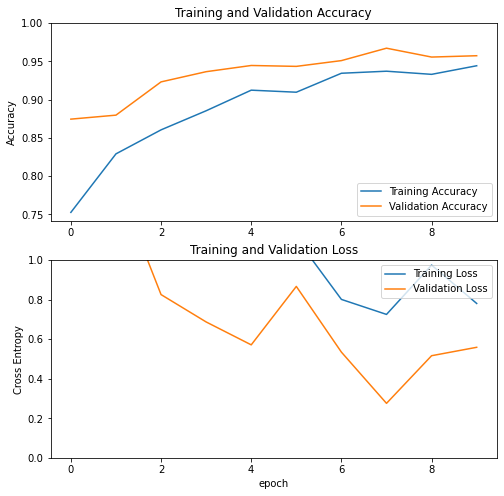

In [15]:
import matplotlib.pyplot as plt
import numpy as np

N = 20
acc = m.history['acc']
val_acc = m.history['val_acc']

loss = m.history['loss']
val_loss = m.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [16]:
loss, accuracy = model.evaluate(test_set)
print('Test accuracy :', accuracy)
print('LOSS:',loss)

54/54 [==============================] - 51s 939ms/step - loss: 0.5590 - acc: 0.9572
Test accuracy : 0.9571759104728699
LOSS: 0.5590198636054993


In [17]:
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

In [18]:
nd_y_true = vgg_test_generator_nd.classes
nd_y_pred = predict_nd.argmax(axis=1)
plot_confusion_matrix(nd_y_true, nd_y_pred, classes=class_names,
                      title='Confusion matrix, without normalization')

NameError: name 'vgg_test_generator_nd' is not defined

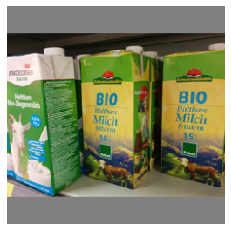

13
13


In [14]:
x, y = next(iter(test_set))
image = x[0, :, :, :]
true_index = np.argmax(y[0])
plt.imshow(image)
plt.axis('off')
plt.show()
prediction_scores = model.predict(np.expand_dims(image, axis=0))
predicted_index = np.argmax(prediction_scores)
print(true_index)
print(predicted_index)
# print("True label: " + class_names[true_index])
# print("Predicted label: " + class_names[predicted_index])

In [19]:
from __future__ import absolute_import, division, print_function, unicode_literals
import os

import tensorflow as tf


In [21]:
saved_model_dir = 'C:\\Users\\Praveen\\Desktop\\ShopBot\\'
tf.saved_model.save(model, saved_model_dir)

converter = tf.lite.TFLiteConverter.from_saved_model(saved_model_dir)
tflite_model = converter.convert()

with open('model.tflite', 'wb') as f:
  f.write(tflite_model)

labels = '\n'.join(sorted(training_set.class_indices.keys()))

with open('labels.txt', 'w') as f:
  f.write(labels)

INFO:tensorflow:Assets written to: C:\Users\Praveen\Desktop\ShopBot\assets
